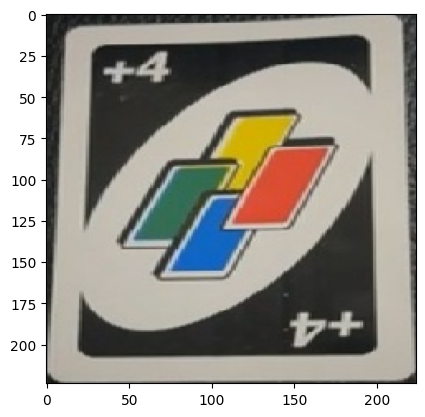

(1, 224, 224, 3)
1/1 [==============================] - 0s 164ms/step
11.7078905
Wild card
The card is 


In [5]:
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import time           # for timing related operations
#from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import cv2


# open the default camera
cap = cv2.VideoCapture(1)

# check if camera is opened successfully
if not cap.isOpened():
    print("Error opening camera")
else:
    # show live video for 10 seconds
    start_time = time.time()
    while time.time() - start_time < 10:
        # read a frame from the camera
        ret, frame = cap.read()

        # check if frame is read successfully
        if not ret:
            print("Error reading frame")
            break

        # display the live video
        cv2.imshow('Live Video', frame)

        # wait for 1 millisecond and check if 'q' key is pressed
        if cv2.waitKey(1) == ord('q'):
            break

    # capture a photo after 10 seconds
    ret, photo = cap.read()

    # save the photo as a JPEG file
    if ret:
        cv2.imwrite("C:/Users/jithu/Desktop/PDE4434/image/test.jpeg", photo)

    
    # Load the saved image and resize it
    img = image.load_img("C:/Users/jithu/Desktop/PDE4434/image/test.jpeg", target_size=(500, 500))


    # release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()




img_colour = cv2.imread('C:/Users/jithu/Desktop/PDE4434/image/test.jpeg')   # open the saved image in colour
img = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)   # convert to B/W
img_sm = cv2.blur(img, (5, 5))         # smoothing
thr_value, img_th = cv2.threshold(img_sm, 110, 255, cv2.THRESH_BINARY)   # binarisation
kernel = np.ones((5, 5), np.uint8)
img_close = cv2.morphologyEx(img_th, cv2.MORPH_OPEN, kernel)      # morphology correction
img_canny = cv2.Canny(img_close, 50, 200)                          # edge detection
contours, hierarchy = cv2.findContours(img_close, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)   # extract contours on binarised image, not on canny
    # paint contours on top of original coloured mage
cv2.imshow('picture', img_colour)




imgc = cv2.imread('C:/Users/jithu/Desktop/PDE4434/image/test.jpeg')    # open the saved image in colour 
max_area = 0
max_contour = None
for i, c in enumerate(contours):         # loop through all the found contours
        
    area = cv2.contourArea(c)
    if area > max_area:
        max_area = area
        max_contour = c
    perimeter = cv2.arcLength(c, True)     # perimeter of contour c (curved length)
                
    epsilon = 0.001*perimeter    # parameter of polygon approximation: smaller values provide more vertices
    vertex_approx = len(cv2.approxPolyDP(c, epsilon, True))     # approximate with polygon


    cv2.putText(imgc, str(i), (c[0, 0, 0]+20, c[0, 0, 1]+30), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))    # identify contour c
    if vertex_approx == 4:  # if the contour has only 4 vertices
        x,y,w,h = cv2.boundingRect(c)  # get the bounding rectangle of the contour
        cv2.rectangle(imgc, (x,y), (x+w,y+h), (0, 0, 255), 2)  # draw a red rectangle around the contour

if max_contour is not None:
    x,y,w,h = cv2.boundingRect(max_contour)  # get the bounding rectangle of the contour
    contour_img = img_colour[y:y+h, x:x+w]  # crop the contour from the original image
    cv2.imwrite('C:/Users/jithu/Desktop/pde4434/images/Test1.jpeg', contour_img)  # save the contour as a separate image


model=load_model("uno number1-cnn.h5")

path="images"
i=0

for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    print(x.shape)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=0)
    
    nameList = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Draw 2', 'Reverese', 'NO CARD DETECTED','Wild card', 'Wild card draw 4', 'skip'] 
    pVal = max(pred[0])
    print(pVal)
    
    maxIndex = 0
    for i in pred[0]:
        if i==pVal:
            break
        maxIndex+=1
    
    print(nameList[maxIndex])



# Read the image and convert it to the HSV color space
image = cv2.imread('C:/Users/jithu/Desktop/pde4434/images/Test1.jpeg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color ranges for each of the cards
color_ranges = {
    '': ((0, 0, 0), (50, 50, 50)),
    'blue': ((90, 100, 100), (130, 255, 255)),
    'green': ((40, 100, 100), (80, 255, 255)),
    'yellow': ((20, 100, 100), (40, 255, 255)),
    'red': ((0, 100, 100), (20, 255, 255))
    
}

# Iterate through each color range and find the pixels within that range
for color, (lower, upper) in color_ranges.items():
    mask = cv2.inRange(hsv_image, np.array(lower), np.array(upper))
    count = cv2.countNonZero(mask)
    
    # Print the color of the card if enough pixels are detected in the range
    if count > 100:
        
        print(f"The card is {color}")
        break


font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    frame = cv2.imread("C:/Users/jithu/Desktop/pde4434/image/Test.jpeg")

    cv2.putText(frame, f"The card is {color}", (50, 50), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.putText(frame, nameList[maxIndex], (50, 100), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Result', cv2.resize(frame, (640, 480)))


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()








